 1.What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.


Clustering is an unsupervised learning technique that groups data points based on similarity. K-Means and Hierarchical Clustering are two widely used methods but they differ fundamentally in approach, assumptions, and output.

 - K-Means Clustering is a partitional algorithm. It begins by selecting k initial centroids (the number of clusters must be specified in advance). Each data point is assigned to the nearest centroid based on a distance metric (usually Euclidean distance). The centroids are then updated as the mean of all assigned points, and this process repeats until cluster assignments stabilize or a convergence criterion is met. K-Means is computationally efficient and works best on large datasets where clusters are roughly spherical and of similar size. However, it is sensitive to the initial choice of centroids and outliers.

- Hierarchical Clustering, on the other hand, builds a nested hierarchy of clusters. It can be agglomerative (bottom-up) or divisive (top-down). Agglomerative clustering starts with each data point as its own cluster and then successively merges the two most similar clusters until all points belong to one cluster. The result is a dendrogram, a tree-like diagram showing how clusters are merged at each step. This allows the user to “cut” the tree at any level to obtain the desired number of clusters. Unlike K-Means, it does not require pre-specifying k and can reveal complex, non-spherical cluster structures. However, it becomes computationally expensive for very large datasets.

 - Use cases:

 - K-Means: Market segmentation in retail or e-commerce where millions of customers can be grouped by purchase behavior.

 - Hierarchical: Gene expression analysis in bioinformatics where understanding the nested similarity of genes is more important than fixed cluster counts.

 - Thus, K-Means provides a flat partition suitable for large, well-separated data, whereas Hierarchical Clustering provides a full hierarchical view suited for exploratory analysis.



 2.Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.


 - When applying clustering algorithms like K-Means or Hierarchical Clustering, one major challenge is evaluating how well the data points have been grouped, especially since clustering is an unsupervised task and there are usually no true labels for comparison. The Silhouette Score is a widely used internal validation metric designed to measure the quality and consistency of clusters produced by an algorithm.

For each data point, the Silhouette Score combines two key aspects:

Cohesion (a): How similar a point is to other points in its own cluster (measured as the average distance to all other points in the same cluster).

Separation (b): How dissimilar a point is to points in the nearest neighboring cluster (measured as the lowest average distance to any other cluster).

The Silhouette value for a single point is calculated as:

𝑆
=
𝑏
−
𝑎
max
⁡
(
𝑎
,
𝑏
)
S=
max(a,b)
b−a
	​


This value ranges from –1 to +1:

+1: The point is well matched to its own cluster and far from others (ideal).

0: The point lies on or very near a cluster boundary.

Negative: The point may be assigned to the wrong cluster.

 - The overall Silhouette Score of the clustering is the average of all individual scores. A higher average score indicates that clusters are dense and well separated; a lower or negative score indicates overlapping or poorly formed clusters.

 - Purpose: The Silhouette Score provides an objective, quantitative measure to compare different clustering algorithms, distance metrics, or numbers of clusters. For example, when using K-Means, plotting the average Silhouette Score for different k values helps identify the most appropriate number of clusters. Thus, it is an essential tool for validating and fine-tuning clustering results when ground-truth labels are absent.



 3.What are the core parameters of DBSCAN, and how do they influence the
clustering process?

 - DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful clustering algorithm that groups points based on the density of data in a region rather than distance from a centroid. Unlike K-Means, it does not require the number of clusters to be specified in advance and can detect arbitrarily shaped clusters as well as noise (outliers). Its behavior is primarily governed by two core parameters: eps (ε) and min_samples.

 - ε (eps): Neighborhood Radius

 - eps defines the radius of the neighborhood around a data point. In other words, it specifies how close other points must be to be considered “neighbors.”

 - A smaller eps means that only very close points are considered part of the same neighborhood, leading to more, smaller clusters and possibly many points labeled as noise.

 - A larger eps allows points farther apart to be grouped, resulting in fewer, larger clusters but with the risk of merging distinct groups.

 - min_samples: Minimum Points per Cluster

 - This parameter specifies the minimum number of points required within the eps neighborhood for a point to be considered a core point (a point inside a dense region).

 - Higher min_samples makes the algorithm more conservative: fewer points qualify as core points, leading to fewer clusters and more noise.

 - Lower min_samples makes DBSCAN more permissive, potentially forming many small or spurious clusters.

 - Interaction of Parameters:
A point is classified as:

 - Core point if it has at least min_samples within eps.

 - Border point if it’s within eps of a core point but has fewer than min_samples.

 - Noise point if it does not meet either condition.

 - Thus, tuning eps and min_samples is critical: together they control the density threshold, cluster shape, and the identification of outliers. Proper parameter choice allows DBSCAN to reveal natural structures in data without specifying the number of clusters beforehan


4.Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?


- Most clustering algorithms, including K-Means and DBSCAN, rely heavily on distance measures (typically Euclidean distance, but also Manhattan or others) to determine how similar or dissimilar two data points are. These distances directly influence how points are grouped into clusters. If features are measured on very different scales (e.g., income in thousands vs. age in years), the feature with the larger numerical range will dominate the distance calculation and distort the clustering outcome.

 - K-Means:
This algorithm assigns points to the nearest cluster centroid and then updates centroids as the mean of assigned points. Both the assignment and centroid calculation depend on distances. If one feature has much larger values than others, it will pull centroids more strongly in its direction, effectively overshadowing other features. This can lead to misleading cluster shapes and biased results.

- DBSCAN:
DBSCAN groups points based on the density of their neighborhoods within a specified radius eps. The density is also computed using distances between points. Without scaling, one feature with a large range may stretch the distance metric, making dense regions appear sparse or vice versa. As a result, DBSCAN may incorrectly label points as noise or merge/split clusters improperly.

 - Why Feature Scaling Helps:
Scaling techniques like standardization (z-scores: subtract mean, divide by standard deviation) or min–max normalization (rescale to [0,1]) bring all features to a comparable range. This ensures that each feature contributes equally to the distance metric and prevents dominance by high-magnitude variables.

 - In practice, always scale features before applying K-Means, DBSCAN, or any other distance-based clustering algorithm. This simple preprocessing step often dramatically improves cluster quality, interpretability, and the stability of parameters like k in K-Means or eps in DBSCAN.


5.What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

 - A key challenge when using K-Means clustering is deciding how many clusters (k) to use. Choosing too few clusters can oversimplify the structure of the data, while too many can overfit and create meaningless groups. The Elbow Method is a widely used heuristic to estimate a suitable k.

 - K-Means works by minimizing the within-cluster sum of squares (WCSS), also called inertia. This measures the total squared distance between each point and its assigned cluster centroid. As k increases, WCSS always decreases because more clusters naturally reduce the distance from points to centroids. However, beyond a certain point, the improvement gained by adding more clusters becomes marginal.

 - The Elbow Method exploits this behavior:

 - Run K-Means for a range of k values (e.g., 1 to 10).

 - Compute the WCSS (or inertia) for each k.

 - Plot k on the x-axis and WCSS on the y-axis.

 - The resulting curve typically shows a sharp drop in WCSS for small k, followed by a gradual flattening. The point on the graph where the curve starts to “bend” or show a clear inflection resembles an elbow. This elbow marks the stage at which adding more clusters provides diminishing returns. The k at this elbow is considered a good trade-off between compactness and simplicity of clusters.

- Purpose:
 - The Elbow Method provides a visual, data-driven approach to choose k without ground-truth labels. It is not a strict mathematical rule but a guideline that helps practitioners avoid arbitrary choices. Combined with other metrics like the Silhouette Score, it can improve the robustness of cluster selection and make K-Means results more interpretable.




##.Use make_blobs, make_moons, and sklearn.datasets.load_wine() as specified.
## Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),apply KMeans clustering, and visualize the results with cluster centers.


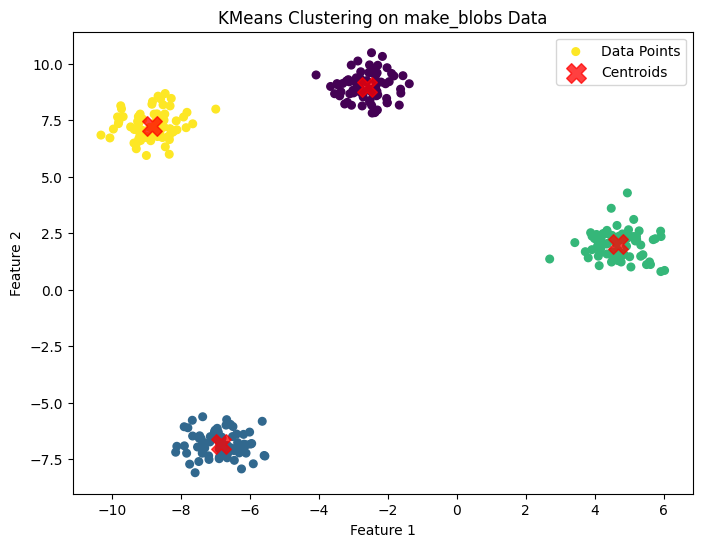

In [1]:
# Question 6: Generate synthetic data using make_blobs, apply KMeans clustering,
# and visualize the results with cluster centers.

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data with 4 centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# 2. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# 3. Get cluster centers
centers = kmeans.cluster_centers_

# 4. Visualize the results
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=30, cmap='viridis', label='Data Points')
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("KMeans Clustering on make_blobs Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## 7.Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load the Wine dataset
wine = load_wine()
X_wine = wine.data

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine)

# 3. Train DBSCAN model
dbscan = DBSCAN(eps=1.8, min_samples=5)  # eps tuned slightly for wine dataset
labels = dbscan.fit_predict(X_scaled)

# 4. Calculate number of clusters excluding noise (-1)
unique_labels = np.unique(labels)
n_clusters = len(unique_labels[unique_labels != -1])

print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 7


## 8.Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.


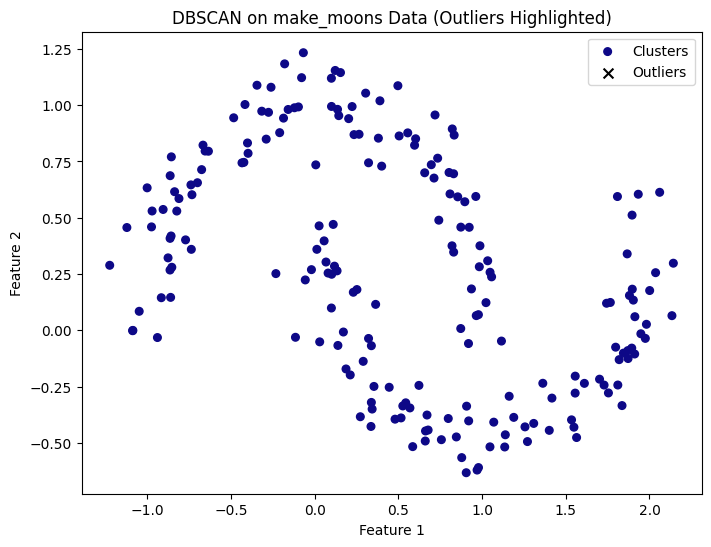

## 9 .Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.


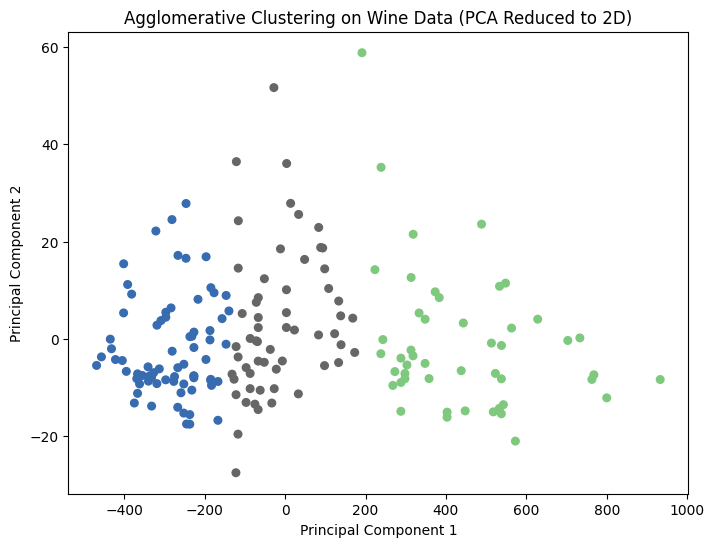

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 1. Load Wine dataset
wine = load_wine()
X_wine = wine.data

# 2. Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_wine_2d = pca.fit_transform(X_wine)

# 3. Apply Agglomerative Clustering (3 clusters to match original wine classes)
agg_clust = AgglomerativeClustering(n_clusters=3)
labels_agg = agg_clust.fit_predict(X_wine_2d)

# 4. Visualize in 2D
plt.figure(figsize=(8,6))
plt.scatter(X_wine_2d[:,0], X_wine_2d[:,1], c=labels_agg, cmap='Accent', s=30)
plt.title("Agglomerative Clustering on Wine Data (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


 10. You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?



1️⃣ Choice of Clustering Algorithm

Start with K-Means: efficient for large datasets, produces compact clusters, easy to interpret for marketing.

Optionally test DBSCAN: to detect outliers or unusual customers (very high spenders, bots).

Optionally try Hierarchical: for small subsets to visualize nested structure.

2️⃣ Preprocessing Steps

Handle missing values:

Numerical features: impute with median or mean.

Categorical features: impute with mode or create an “Unknown” category.

Convert categorical variables: one-hot encode or use frequency encoding.

Feature scaling: Standardize (z-score) or MinMax scale all numeric features so that no feature dominates the distance metric.

Optional: Dimensionality reduction (PCA) to reduce noise and make visualization easier.

3️⃣ Determine the Number of Clusters

Use the Elbow Method on K-Means inertia to see where WCSS stops decreasing sharply.

Validate with Silhouette Score: choose k that maximizes it.

Cross-check with business sense (marketing’s expected segments).

4️⃣ Business Benefits

Personalized promotions: Identify “high-value frequent buyers,” “occasional discount seekers,” “single-category loyalists,” etc.

Customer lifetime value prediction: Focus retention on profitable clusters.

New product recommendations: Target clusters with similar interests.

Marketing efficiency: Allocate budget to clusters most likely to respond.

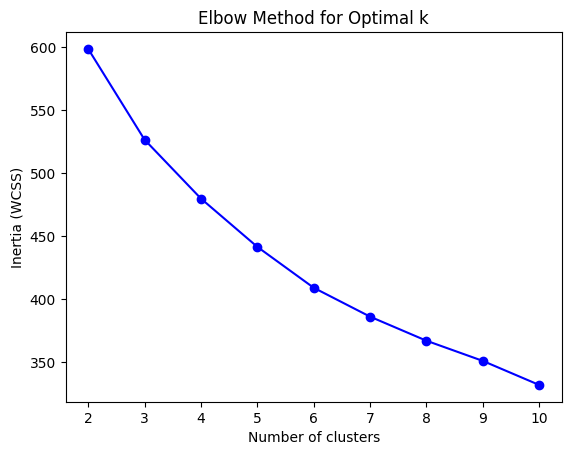

Silhouette Score: 0.14174964464139403

Cluster Characteristics (Mean values):
         CustomerID        Age   AnnualIncome  SpendingScore  \
Cluster                                                        
0         39.347826  30.173913   83628.857143      23.850000   
1         41.631579  52.789474   59014.333333      65.631579   
2         68.918919  50.027027  113396.942857      54.138889   
3         38.285714  33.000000   79338.000000      46.250000   

         CategoryA_Purchases  CategoryB_Purchases  CategoryC_Purchases  
Cluster                                                                 
0                   7.000000             3.695652             5.347826  
1                  12.947368             4.631579             7.473684  
2                   9.243243             7.405405             3.324324  
3                  13.523810            11.333333             4.666667  


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Load customer data (replace with real CSV)
# df = pd.read_csv("customer_data.csv")
# Example structure: df has demographics + purchase frequencies per category

# Create a sample DataFrame to simulate customer data
data = {
    'CustomerID': range(1, 101),
    'Age': np.random.randint(18, 65, 100),
    'AnnualIncome': np.random.randint(20000, 150000, 100),
    'SpendingScore': np.random.randint(1, 100, 100),
    'CategoryA_Purchases': np.random.randint(0, 20, 100),
    'CategoryB_Purchases': np.random.randint(0, 15, 100),
    'CategoryC_Purchases': np.random.randint(0, 10, 100)
}
df = pd.DataFrame(data)


# 2. Handle missing values
# Introduce some missing values for demonstration
for col in ['AnnualIncome', 'SpendingScore']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan


imputer = SimpleImputer(strategy='median')
# Select only numerical columns for imputation and clustering
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
X_num = imputer.fit_transform(df[numerical_cols])

# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# 4. Find optimal number of clusters with Elbow Method
inertia = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for suppress warning
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

# 5. Choose best k (say k=4 after elbow)
# For demonstration, choosing k=4. In a real scenario, you'd examine the elbow plot.
optimal_k = 4 # Replace with the value observed from the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Added n_init
labels = kmeans.fit_predict(X_scaled)

# 6. Evaluate with silhouette score
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

# 7. Append cluster labels back to original data
# Create a temporary DataFrame for scaled features before appending labels
df_scaled = pd.DataFrame(X_scaled, columns=numerical_cols, index=df.index)
df_scaled['Cluster'] = labels

# To examine cluster characteristics on original scale, you might want to join back or use the original df
df['Cluster'] = labels

# 8. Examine cluster characteristics for marketing
print("\nCluster Characteristics (Mean values):")
print(df.groupby('Cluster')[numerical_cols].mean())